## 10. Лабораторная работа «Использование композиций алгоритмов при решении задач машинного обучения» 

Dataset: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
header = ["ID", "Diagnosis", "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
           "Compactness Mean", "Concavity Mean", "Concave points Mean", "Symmetry Mean", "Fractal dimension Mean",
           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE",
           "Concave points SE", "Symmetry SE", "Fractal dimension SE", "Radius Worst", "Texture Worst", "Perimeter Worst",
           "Area Worst", "Smoothness Worst", "Compactness Worst", "Concavity Worst", "Concave points Worst",
           "Symmetry Worst", "Fractal dimension Worst"]  
data = pd.read_csv("wdbc.data", names=header)
data = data.astype({"Diagnosis": "category"})
data.drop(columns=['ID'], inplace=True)
data.sample(5)

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
103,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,0.1803,1.222,1.528,11.77,0.009058,0.02196,0.030290,0.011120,0.01609,0.003570,10.76,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490
469,B,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,0.4101,1.740,3.027,27.85,0.014590,0.03206,0.049610,0.018410,0.01807,0.005217,13.36,25.40,88.14,528.1,0.1780,0.2878,0.31860,0.14160,0.2660,0.09270
185,B,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.268,2.680,26.43,0.014390,0.01200,0.001597,0.002404,0.02538,0.003470,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
72,M,17.200,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,0.5907,1.041,3.705,69.47,0.005820,0.05616,0.042520,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.65660,0.18990,0.3313,0.13390
349,B,11.950,14.96,77.23,426.7,0.11580,0.12060,0.011710,0.017870,0.2459,0.06581,0.3610,1.050,2.455,26.65,0.005800,0.02417,0.007816,0.010520,0.02734,0.003114,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590


In [4]:
display(data.describe())

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Missing values нет - верим наслово сайту UCI

### Random Forest

In [18]:
X = data.drop(columns=["Diagnosis"]).copy()
y = data["Diagnosis"].copy().cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1337)

Посчитаем деревья, когда качество максимально

In [19]:
params = {"n_estimators": np.arange(10, 201, 1)}
clf_rfc = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1)
clf_rfc.fit(X_train, y_train)
clf_rfc.best_params_

{'n_estimators': 35}

Найдём минимальное число деревьев, которое даст качество на кросс-валидации свыше 60%.

In [20]:
idx = np.where(clf_rfc.cv_results_["mean_test_score"] >= 0.6)[0]
if len(idx) > 0:
    display(clf_rfc.cv_results_["params"][idx[0]])

{'n_estimators': 10}

Вычислим и построим ROC-кривую

In [21]:
def calc_plot_roc(clf, X_test, y_test, classes):
    n_classes = len(classes)
    y_pred = clf.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

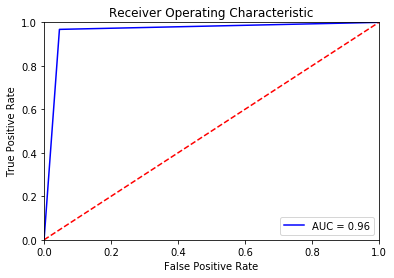

In [22]:
classes = data["Diagnosis"].unique()
calc_plot_roc(clf_rfc, X_test, y_test, classes)

### Gradient Boosting

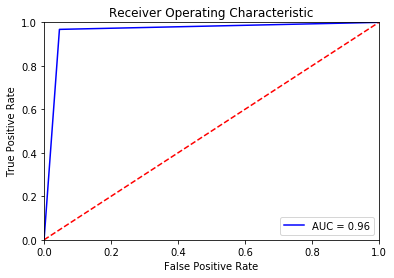

In [23]:
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
calc_plot_roc(clf_rfc, X_test, y_test, classes)